<a href="https://colab.research.google.com/github/bernaldiaz/curso-numerico-3/blob/main/T11TeoriaAproximaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 11 - Teoría de la Aproximación

## Librerías y Funciones Necesarias

In [ ]:
import numpy as np
import math
import cmath
import pandas as pd
from plotnine import *
pd.set_option('max_columns', None)

In [ ]:
def SE(real, aprox):
    """
    Dados el array de valores reales y el array de aproximaciones, calcula el error cuadrático
    
    Args:
        real: (ndarray) Array de valores reales
        aprox: (ndarray) Array de aproximaciones
        
    Returns:
        error: (float) Error cuadrático
    """ 

    error = 0
    for k in range(real.shape[0]):
        error += math.pow(real[k] - aprox[k], 2)

    return error

In [ ]:
def ValoresPolinomioGradoN(coefs, x, n):
    """
    Dados el array de coeficientes ak, el array del término independientes x y el grado
    del polinomio n, calcula las aproximaciones del polinomio 
    P(x) = a0 + a1 * x + a2 * x^2 + ... + an * x^n
    
    Args:
        coefs: (ndarray) Array de coeficientes
        x: (ndarray) Array de primeras coordenadas de los puntos de la nube de puntos (x_k, y_k)
        n: (int) Grado del polinomio
        
    Returns:
        aprox: (ndarray) Array de aproximaciones P(x)
    """ 

    if coefs.shape[0] != n + 1:
        print("La longitud del array de coeficientes no es correcta")
        return
    
    m = x.shape[0] # Número de puntos de la nube de puntos
    aprox = np.zeros(m) 
    for i in range(m):
        aprox[i] = coefs[0]
        for j in range(1, n + 1):
            aprox[i] += coefs[j] * math.pow(x[i], j)

    return aprox


In [ ]:
def ValoresAproximacionTrigonometricaDiscreta(a, b, x, n):
    """
    Dados el array de coeficientes ak, el array de coeficientes bk, el array del 
    término independientes x y el grado de la función Sn(x), n, calcula las aproximaciones 
    de la función trigonométrica Sn(x)
    
    Args:
        a: (ndarray) Array de coeficientes ak
        b: (ndarray) Array de coeficientes bk
        x: (ndarray) Array de primeras coordenadas de los puntos de la nube de puntos (x_k, y_k)
        n: (int) Grado de la función trigonométrica Sn(x)
        
    Returns:
        aprox: (ndarray) Array de aproximaciones Sn(x)
    """ 

    if a.shape[0] != n + 1 and b.shape[0] != n - 1:
        print("La longitud de los arrays de coeficientes no es correcta")
        return
    
    m = x.shape[0] # Número de puntos de la nube de puntos
    aprox = np.zeros(m) 
    for i in range(m):
        aprox[i] = a[0] / 2
        for j in range(1, n + 1):
            if j < n:
                aprox[i] += a[j] * math.cos(j * x[i]) + b[j - 1] * math.sin(j * x[i])
            else: #j == n
                aprox[i] += a[j] * math.cos(j * x[i])
    return aprox

In [ ]:
def FuncionFFT(a, b, x, n):
    """
    Dados el array de coeficientes ak, el array de coeficientes bk, el array del 
    término independientes x y el grado de la serie de Fourier Discreta Sn(x), n, 
    calcula las aproximaciones de la función Sn(x)
    
    Args:
        a: (ndarray) Array de coeficientes ak
        b: (ndarray) Array de coeficientes bk
        x: (float) Primera coordenada de un punto de la nube de puntos (x_k, y_k)
        n: (int) Grado de la serie de Fourier Discreta Sn(x)
        
    Returns:
        aprox: (float) Aproximación Sn(x)
    """ 

    if a.shape[0] != n + 1 and b.shape[0] != n - 1:
        print("La longitud de los arrays de coeficientes no es correcta")
        return
     
    aprox = (a[0] + a[n] * math.cos(n * x)) / 2
    for j in range(1, n):
        aprox += a[j] * math.cos(j * x) + b[j - 1] * math.sin(j * x)
    return aprox

In [ ]:
def ValoresFFT(a, b, x, n):
    """
    Dados el array de coeficientes ak, el array de coeficientes bk, el array del 
    término independientes x y el grado de la serie de Fourier Discreta Sn(x), n, 
    calcula las aproximaciones de la función Sn(x)
    
    Args:
        a: (ndarray) Array de coeficientes ak
        b: (ndarray) Array de coeficientes bk
        x: (ndarray) Array de primeras coordenadas de los puntos de la nube de puntos (x_k, y_k)
        n: (int) Grado de la serie de Fourier Discreta Sn(x)
        
    Returns:
        aprox: (ndarray) Array de aproximaciones Sn(x)
    """ 

    if a.shape[0] != n + 1 and b.shape[0] != n - 1:
        print("La longitud de los arrays de coeficientes no es correcta")
        return
    
    m = x.shape[0] # Número de puntos de la nube de puntos
    aprox = np.zeros(m)  
    for i in range(m):
        aprox[i] = (a[0] + a[n] * math.cos(n * x[i])) / 2
        for j in range(1, n):
            aprox[i] += a[j] * math.cos(j * x[i]) + b[j - 1] * math.sin(j * x[i])
    return aprox

In [ ]:
def FuncionFFTIntervaloArbitrario(a, b, t, start, end, n):
    """
    Dados el array de coeficientes ak, el array de coeficientes bk, el array del 
    término independientes t definido en el intervalo [start, end] y el grado 
    de la serie de Fourier Discreta Sn(x), n, calcula las aproximaciones de la función Sn(x)
    
    Args:
        a: (ndarray) Array de coeficientes ak
        b: (ndarray) Array de coeficientes bk
        t: (float) Primeras coordenadas de un punto de la nube de puntos (t_k, y_k)
        start: (int) Extremo inferior del intervalo [start, end]
        end: (int) Extremo superior del intervalo [start, end]
        n: (int) Grado de la serie de Fourier Discreta Sn(x)
        
    Returns:
        aprox: (float) Aproximación Sn(x)
    """ 

    if a.shape[0] != n + 1 and b.shape[0] != n - 1:
        print("La longitud de los arrays de coeficientes no es correcta")
        return
    
    alpha = 2 * math.pi / (end - start)
    beta = (start + end) / 2
    aprox = (a[0] + a[n] * math.cos(alpha * n * (t - beta))) / 2
    for j in range(1, n):
        aprox += (a[j] * math.cos(alpha * j * (t - beta)) +
                  b[j - 1] * math.sin(alpha * j * (t - beta)))
    return aprox

In [ ]:
def ValoresFFTIntervaloArbitrario(a, b, t, start, end, n):
    """
    Dados el array de coeficientes ak, el array de coeficientes bk, el array del 
    término independientes t definido en el intervalo [start, end] y el grado 
    de la serie de Fourier Discreta Sn(x), n, calcula las aproximaciones de la función Sn(x)
    
    Args:
        a: (ndarray) Array de coeficientes ak
        b: (ndarray) Array de coeficientes bk
        t: (ndarray) Array de primeras coordenadas de los puntos de la nube de puntos (t_k, y_k)
        start: (int) Extremo inferior del intervalo [start, end]
        end: (int) Extremo superior del intervalo [start, end]
        n: (int) Grado de la serie de Fourier Discreta Sn(x)
        
    Returns:
        aprox: (ndarray) Array de aproximaciones Sn(x)
    """ 

    if a.shape[0] != n + 1 and b.shape[0] != n - 1:
        print("La longitud de los arrays de coeficientes no es correcta")
        return
    
    m = t.shape[0] # Número de puntos de la nube de puntos
    alpha = 2 * math.pi / (end - start)
    beta = (start + end) / 2
    aprox = np.zeros(m)  
    for i in range(m):
        aprox[i] = (a[0] + a[n] * math.cos(alpha * n * (t[i] - beta))) / 2
        for j in range(1, n):
            aprox[i] += (a[j] * math.cos(alpha * j * (t[i] - beta)) + 
                         b[j - 1] * math.sin(alpha * j * (t[i] - beta)))
    return aprox

In [ ]:
def HelperPlotLineal(x, y, a0, a1):
    """
    Dados una nube de puntos (x_k, y_k) y los coeficientes a0 y a1, muestra un 
    gráfico donde se muestran los puntos de la nube y la recta y = a0 + a1x
    
    Args:
        x: (ndarray) Array de primeras coordenadas de los puntos de la nube de puntos (x_k, y_k)
        y: (ndarray) Array de segundas coordenadas de los puntos de la nube de puntos (x_k, y_k)
        a0: (float) Término independiente de la recta y = a0 + a1x
        a1: (float) Coeficiente lineal de la recta y = a0 + a1x
    """ 

    df = pd.DataFrame({"x": x, "y": y, "end": a0 + a1 * x}) 
    p = ggplot(df, aes(x = "x", y = "y"))
    (p
    + geom_segment(aes(x = "x", y = "y", xend = "x", yend = "end"), color = "red")
    + geom_point(aes(y = "end"), color = "blue", size = 0.5)
    + geom_line(aes(y = "end"), color = "blue")
    + geom_point(color = "black")
    + ylab("")
    + xlab("x")
    + xlim(df["x"].iloc[0] - 0.5, df["x"].iloc[-1] + 0.5) 
    + ggtitle("yHat = {} + {}x\nSE = {}".format(round(a0, 3), round(a1, 3), 
                                                 round(SE(y, np.array(a0 + a1 * x)), 3)))
    ).draw();

In [ ]:
def HelperPlotPolinomial(x, y, a):
    """
    Dados una nube de puntos (x_k, y_k) y el ndarray de coeficientes a, muestra un 
    gráfico donde se muestran los puntos de la nube y el polinomio de aproximación
    
    Args:
        x: (ndarray) Array de primeras coordenadas de los puntos de la nube de puntos (x_k, y_k)
        y: (ndarray) Array de segundas coordenadas de los puntos de la nube de puntos (x_k, y_k)
        a: (ndarray) Array de coeficientes a0, a1,..., an
    """ 

    n = a.shape[0] - 1 # Grado del polinomio de aproximación
    m = x.shape[0] # Número de puntos de la nube de puntos
    
    # Calculamos los valores aproximados por el polinomio de aproximación de grado n
    polynomial = ValoresPolinomioGradoN(a, x, n)

    # Construimos el string que muestra el polinomio de aproximación de grado n
    polynomialText = "{}".format(round(a[0], 3))
    for i in range(1, n + 1):
        polynomialText += " + {}x^{}".format(round(a[i], 3), i)

    df = pd.DataFrame({"x": x, "y": y, "end": polynomial}) 
    p = ggplot(df, aes(x = "x", y = "y"))
    (p
    + geom_segment(aes(x = "x", y = "y", xend = "x", yend = "end"), color = "red")
    + geom_point(aes(y = "end"), color = "blue", size = 0.5)
    + geom_line(aes(y = "end"), color = "blue")
    + geom_point(color = "black")
    + ylab("")
    + xlab("x")
    + xlim(df["x"].iloc[0] - 0.5, df["x"].iloc[-1] + 0.5) 
    + ggtitle("y = {}\nSE = {}".format(polynomialText, 
                                        round(SE(y, polynomial), 3)))
    ).draw();

In [ ]:
def HelperPlotTrigonometrico(x, y, a, b):
    """
    Dados una nube de puntos (x_k, y_k), el ndarray de coeficientes a, y el ndarray
    de puntos b, muestra un gráfico donde se muestran los puntos de la nube y la función
    Sn(x) de aproximación
    
    Args:
        x: (ndarray) Array de primeras coordenadas de los puntos de la nube de puntos (x_k, y_k)
        y: (ndarray) Array de segundas coordenadas de los puntos de la nube de puntos (x_k, y_k)
        a: (ndarray) Array de coeficientes a0, a1,..., an
        b: (ndarray) Array de coeficientes b0, b1,..., b(n - 2)
    """ 

    n = a.shape[0] - 1 # Número entero n
    m = x.shape[0] # Número de puntos de la nube de puntos
    
    # Calculamos los valores aproximados por la función de aproximación trigonométrica Sn(x)
    fun = ValoresAproximacionTrigonometricaDiscreta(a, b, x, n)

    # Construimos el string que muestra el polinomio de aproximación de grado n
    funText = "{}".format(round(a[0] / 2, 3))
    for i in range(1, n + 1):
        funText += " + {}cos({}x)".format(round(a[i], 3), i)
    for i in range(n - 1):
        funText += " + {}sin({}x)".format(round(b[i], 3), i + 1)

    df = pd.DataFrame({"x": x, "y": y, "end": fun}) 
    p = ggplot(df, aes(x = "x", y = "y"))
    (p
    + geom_segment(aes(x = "x", y = "y", xend = "x", yend = "end"), color = "red")
    + geom_point(aes(y = "end"), color = "blue", size = 0.5)
    + geom_line(aes(y = "end"), color = "blue")
    + geom_point(color = "black")
    + ylab("")
    + xlab("x")
    + xlim(df["x"].iloc[0] - 0.5, df["x"].iloc[-1] + 0.5) 
    + ggtitle("S{}(x) = {}\nSE = {}".format(n, funText,
                                             round(SE(y, fun), 3)))
    ).draw();

In [ ]:
def HelperPlotFFT(x, y, a, b):
    """
    Dados una nube de puntos (x_k, y_k), el ndarray de coeficientes a, y el ndarray
    de puntos b, muestra un gráfico donde se muestran los puntos de la nube y la función
    Sn(x) de aproximación
    
    Args:
        x: (ndarray) Array de primeras coordenadas de los puntos de la nube de puntos (x_k, y_k)
        y: (ndarray) Array de segundas coordenadas de los puntos de la nube de puntos (x_k, y_k)
        a: (ndarray) Array de coeficientes a0, a1,..., an
        b: (ndarray) Array de coeficientes b0, b1,..., b(n - 2)
    """ 

    m = x.shape[0] # Total de observaciones
    n = a.shape[0] - 1 # Potencia de 2

    # Calculamos los valores aproximados por la función de aproximación Sn(x)
    fun = ValoresFFT(a, b, x, n)

    # Construimos el string que muestra la forma de la transformada de Fourier
    funText = "{} + {}cos({}x)".format(round(a[0] / 2, 3), round(a[n] / 2, 3), n)
    for i in range(1, n):
        funText += " + {}cos({}x)".format(round(a[i], 3), i)
    for i in range(n - 1):
        funText += " + {}sin({}x)".format(round(b[i], 3), i + 1)

    df = pd.DataFrame({"x": x, "y": y, "end": fun}) 
    p = ggplot(df, aes(x = "x", y = "y"))
    (p
    + geom_segment(aes(x = "x", y = "y", xend = "x", yend = "end"), color = "red")
    + geom_point(aes(y = "end"), color = "blue", size = 0.5) 
    + stat_function(aes(x = "x"), fun = lambda x: FuncionFFT(a, b, x, n), color = "blue")
    + geom_point(color = "black")
    + ylab("")
    + xlab("x")
    + xlim(df["x"].iloc[0] - 0.5, df["x"].iloc[-1] + 0.5) 
    + ggtitle("S{}(x) = {}\nSE = {}".format(n, funText,
                                             round(SE(y, fun), 3)))
    ).draw();

In [ ]:
def HelperPlotFFTIntevaloArbitrario(t, start, end, y, a, b):
    """
    Dados una nube de puntos (t_k, y_k), donde los valores t_k están definidos en el intervalo
    [start, end], el ndarray de coeficientes a, y el ndarray de puntos b, muestra un gráfico 
    donde se muestran los puntos de la nube y la función Sn(x) de aproximación
    
    Args:
        t: (ndarray) Array de primeras coordenadas de los puntos de la nube de puntos (t_k, y_k)
        start: (int) Extremo inferior del intervalo [start, end]
        end: (int) Extremo superior del intervalo [start, end]
        y: (ndarray) Array de segundas coordenadas de los puntos de la nube de puntos (t_k, y_k)
        a: (ndarray) Array de coeficientes a0, a1,..., an
        b: (ndarray) Array de coeficientes b0, b1,..., b(n - 2)
    """ 

    m = t.shape[0] # Total de observaciones
    n = a.shape[0] - 1 # Potencia de 2
    
    # Calculamos los valores aproximados por la función de aproximación Sn(x)
    fun = ValoresFFTIntervaloArbitrario(a, b, t, start, end, n)

    # Construimos el string que muestra la forma de la transformada de Fourier
    aux = round((start + end) / 2, 3)
    funText = "{} + {}cos(2pi * {} (t - {}))".format(round(a[0] / 2, 3),
                                                        round(a[n] / 2, 3),
                                                        round(n / (end - start), 3),
                                                        aux)
    for i in range(1, n):
        funText += " + {}cos(2pi * {}(t - {}))".format(round(a[i], 3),
                                                       round(i / (end - start), 3),
                                                       aux)
    for i in range(n - 1):
        funText += " + {}sin(2pi * {}(t - {}))".format(round(b[i], 3), 
                                                round((i + 1) / (end - start), 3),
                                                aux)

    df = pd.DataFrame({"x": t, "y": y, "end": fun}) 
    p = ggplot(df, aes(x = "x", y = "y"))
    (p
    + geom_segment(aes(x = "x", y = "y", xend = "x", yend = "end"), color = "red")
    + geom_point(aes(y = "end"), color = "blue", size = 0.5) 
    + stat_function(aes(x = "x"), 
                    fun = lambda t: FuncionFFTIntervaloArbitrario(a, b, t, start, end, n), 
                    color = "blue")
    + geom_point(color = "black")
    + ylab("")
    + xlab("x")
    + xlim(df["x"].iloc[0] - 0.5, df["x"].iloc[-1] + 0.5) 
    + ggtitle("S{}(x) = {}\nSE = {}".format(n, funText,
                                             round(SE(y, fun), 3)))
    ).draw();

## Método de Mínimos Cuadrados

### Método de Mínimos Cuadrados Lineal

Hallar la **aproximación lineal por mínimos cuadrados** es hallar la mejor recta tal que la función error

$$E\left(\hat{f}\right) = \sum_{k = 1}^m \left(y_k - \hat{f}(x_k)\right)^2$$

es mínima. Es decir, hallamos los coeficientes $a_0$ y $a_1$ tal que la suma de los errores al cuadrado entre las ordenadas $y_k$ y los valores dados por la recta $a_0 + a_1x_k$,

$$(y_k - a_0 - a_1x_k)^2$$

 es mínima.

In [ ]:
def MinimosCuadradosLineal(x, y, verbose = False):
    """
    Ofrece una aproximación de los coeficientes a0 y a1 para la nube de m 
    puntos (x_k, y_k)  

    Args:
        x: (ndarray) Array de primeras coordenadas de los puntos de la nube de puntos (x_k, y_k)
        y: (ndarray) Array de segundas coordenadas de los puntos de la nube de puntos (x_k, y_k)
        verbose: (bool) Para mostrar o no los resultados relevantes

    Returns:
        (a0, a1): (tuple) Coeficientes a0 y a1
    """

    m = x.shape[0] # Guardamos el número de elementos de x

    if y.shape[0] != m: # Comprobamos si x e y tienen la misma longitud
        print("x e y no tienen el mismo número de elementos")
        return

    # Inicializamos las variables
    sigmaX, sigmaY, sigmaX2, sigmaXY = 0, 0, 0, 0

    for k in range(m):
        sigmaX += x[k]
        sigmaY += y[k]
        sigmaX2 += math.pow(x[k], 2)
        sigmaXY += x[k] * y[k]

    # Hacemos los últimos cálculos para poder obtener a0 y a1
    meanX = sigmaX / m # Media de x
    meanY = sigmaY / m # Media de y
    sX2 = sigmaX2 / m - math.pow(meanX, 2)
    sXY = sigmaXY / m - meanX * meanY

    # Calculamos a0 y a1
    a1 = sXY / sX2
    a0 = meanY - a1 * meanX

    if verbose:
        print("a0 =", a0)
        print("a1 =", a1)

    return (a0, a1)

Veamos un ejemplo considerando la siguiente nube de puntos:

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1.6620781, 7.5824881, 2.6419837, 9.8076052, 10.2366814, 
              11.629404, 14.7915203, 15.7676398, 19.9221514, 20.4909214])

In [ ]:
a0, a1 = MinimosCuadradosLineal(x, y, verbose = True)

a0 = 0.19291463333333603
a1 = 2.047333219393939


Calculemos el error cometido:

In [ ]:
# Valores aproximados
aprox = np.array(a0 + a1 * x)

# Calculamos el error
se = SE(y, aprox)
print("SE =", se)

SE = 30.06247989198013


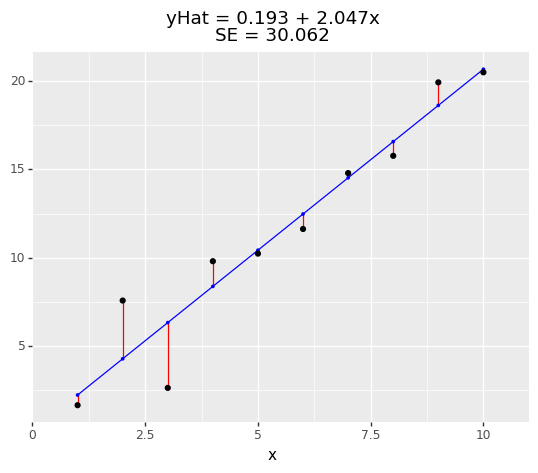

In [ ]:
HelperPlotLineal(x, y, a0, a1)

### Método de Mínimos Cuadrados Polinomial

Hallar la **aproximación polinomial por mínimos cuadrados** es hallar el mejor polinomio $P_n(x)$ tal que la función del error

$$E\left(\hat{f}\right) = \sum_{k = 1}^m \left(y_k - \hat{f}(x_k)\right)^2$$

sea mínima. Es decir, hallamos los coeficientes $a_0$, $a_1$, $\dots, a_n$ tal que la suma de los errores al cuadrado entre las ordenadas $y_k$ y los valores dados por el polinomio $a_0 + a_1x_k + \cdots a_nx_k^n$,

$$(y_k - a_0 - a_1x_k - \cdots - a_nx_k^n)^2$$

 sea mínima.

In [ ]:
def MinimosCuadradosPolinomial(x, y, n, verbose = False):
    """
    Ofrece una aproximación de los coeficientes a0, a1,..., an para la nube de m 
    puntos (x_k, y_k)  

    Args:
        x: (ndarray) Array de primeras coordenadas de los puntos de la nube de puntos (x_k, y_k)
        y: (ndarray) Array de segundas coordenadas de los puntos de la nube de puntos (x_k, y_k)
        n: (int) Grado del polinomio a interpolar
        verbose: (bool) Para mostrar o no los resultados relevantes

    Returns:
        a: (ndarray) Array de coeficientes a0, a1,..., an
    """

    m = x.shape[0] # Guardamos el número de elementos de x

    if y.shape[0] != m: # Comprobamos si x e y tienen la misma longitud
        print("x e y no tienen el mismo número de elementos")
        return

    # Inicializamos las variables
    A = np.zeros((n + 1, n + 1))
    b = np.zeros(n + 1)

    for k in range(m):
        for i in range(n + 1):
            b[i] += y[k] * math.pow(x[k], i)
            
            for j in range(n + 1):
                A[i, j] += math.pow(x[k], i + j)

    # Resolvemos el sistema Aa = b mediante el método solve de numpy
    a = np.linalg.solve(A, b)

    if verbose:
        for i in range(n + 1):
            print("a{} = {}".format(i, a[i]))

    return a

Veamos un ejemplo considerando los siguientes datos:

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1.6620781, 7.5824881, 2.6419837, 9.8076052, 10.2366814, 
              11.629404, 14.7915203, 15.7676398, 19.9221514, 20.4909214])
n = 2

In [ ]:
a = MinimosCuadradosPolinomial(x, y, n, verbose = True)

a0 = 0.8809091666667184
a1 = 1.7033359527272525
a2 = 0.03127247878788043


Calculemos el error cometido:

In [ ]:
# Valores aproximados
aprox = ValoresPolinomioGradoN(a, x, n)

# Calculamos el error
se = SE(y, aprox)
print("SE =", se)

SE = 29.5461128251839


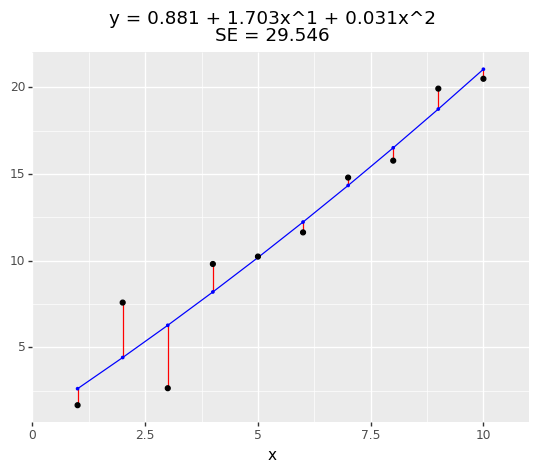

In [ ]:
HelperPlotPolinomial(x, y, a)

## Aproximación Trigonométrica Discreta

Versión discreta de cómo aproximar una función $f$ integrable en $[-\pi, \pi]$ por una función trigonométrica de la forma

$$S_n(x) = \frac{a_0}{2} + \sum_{j = 1}^n a_j\cos(jx) + \sum_{j = 1}^{n - 1}b_j\sin(jx)$$

In [ ]:
def AproximacionTrigonometricaDiscreta(x, y, n, verbose = False):
    """
    Ofrece una aproximación de los coeficientes a0, a1,..., an, b0, b1,..., b(n-2) 
    para la nube de m puntos (x_k, y_k)  

    Args:
        x: (ndarray) Array de primeras coordenadas de los puntos de la nube de puntos (x_k, y_k)
        y: (ndarray) Array de segundas coordenadas de los puntos de la nube de puntos (x_k, y_k)
        n: (int) Número de coeficientes a_i a calcular
        verbose: (bool) Para mostrar o no los resultados relevantes

    Returns:
        (a, b): (tuple) Array de coeficientes a0, a1,..., an y array de coeficientes b0,..., b(n-2)
    """

    m = (int)(x.shape[0]/2) # Guardamos la mitad del número de elementos de x

    if y.shape[0] != 2*m: # Comprobamos si x e y tienen la misma longitud
        print("x e y no tienen el mismo número de elementos")
        return

    # Inicializamos las variables
    a = np.zeros(n + 1)
    b = np.zeros(n - 1)

    # Calculamos el coeficiente a0
    for i in range(2*m):
        a[0] += y[i]

    # Calculamos el resto de coeficientes ak para k = 1, ..., n - 1 y los 
    # coeficientes bk para k = 0,..., n - 2
    for k in range(1, n):
        for i in range(2*m):
            a[k] += y[i] * math.cos(k * x[i])
            b[k - 1] += y[i] * math.sin(k * x[i])

    # Calculamos el coeficiente an
    for i in range(2*m):
        a[n] += y[i] * math.cos(n * x[i])

    # Dividimos las entradas de los vectores a y b entre m
    a /= m
    b /= m

    if verbose:
        for i in range(n + 1):
            print("a{} = {}".format(i, a[i]))
        for i in range(n - 1):
            print("b{} = {}".format(i, b[i]))

    return (a, b)

Veamos un ejemplo considerando los siguientes datos:

In [ ]:
x = np.array([-math.pi + 2*k * math.pi / 10 for k in range(10)])
y = np.array([math.pow(xk, 2) for xk in x])
n = 2

In [ ]:
a, b = AproximacionTrigonometricaDiscreta(x, y, n, verbose = True)

a0 = 6.711330992740763
a1 = -4.134233564410797
a2 = 1.1426740537170184
b0 = -3.552713678800501e-16


Calculemos el error cometido:

In [ ]:
# Valores aproximados
aprox = ValoresAproximacionTrigonometricaDiscreta(a, b, x, n)

# Calculamos el error
se = SE(y, aprox)
print("SE =", se)

SE = 3.161244331319074


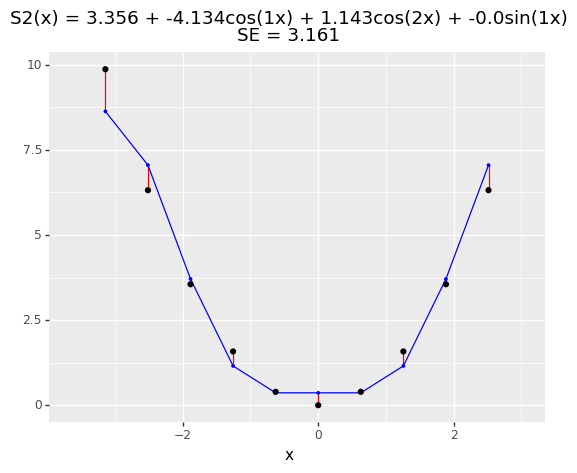

In [ ]:
HelperPlotTrigonometrico(x, y, a, b)

## Transformada Rápida de Fourier

Vamos a hallar la **Transformada de Fourier** de la forma

$$S_m(x) = \frac{a_0 + a_m \cos(mx)}{2} + \sum_{j = 1}^{m - 1}a_j\cos(jx) + \sum_{j = 1}^{m - 1}b_j\sin(jx)$$

con 

$$a_k = \frac{1}{m}\sum_{i = 0}^{2m - 1}y_i\cos(kx_i)\quad k = 0, 1, \dots, m$$

$$b_k = \frac{1}{m}\sum_{i = 0}^{2m - 1}y_i\sin(kx_i)\quad k = 0, 1, \dots, m - 1$$

In [ ]:
def SubirNivel(y, j, c):
    """  
    Args:
        y: (ndarray) Valores de la muestra
        j: (int) 
        c: (ndarray) Coeficientes

    Returns:
        (z, cn): (tuple) Array y reordenado y lista de nuevos coeficientes ck
    """

    L = c.shape[0] # Número de elementos del array unidimensional c
    cn = np.zeros(L, dtype = np.csingle) # Array de los nuevos coeficientes, con elementos de tipo float complex
    z = np.zeros(L) # Array y reordenado

    # Calculamos los elementos del array de los nuevos coeficientes
    for k in range(math.floor(L / 2)):
        cn[k] = c[k] + cmath.exp(1j * k * cmath.pi / math.pow(2, j)) * c[k + math.floor(L / 2)]
        cn[k + math.floor(L / 2)] = c[k] - cmath.exp(1j * k * cmath.pi / 
                                                    math.pow(2, j)) * c[k + math.floor(L / 2)]
    # Reordenamos los elementos del array y
    for i in range(math.floor(L/2)):
        z[2*i] = y[i]
        z[2*i+1] = y[math.floor(L / 2)+i]
    
    # Devolvemos una tupla de un ndarray y una lista
    return (z, cn)


In [ ]:
def TransformadaFourierRapida(m, y, verbose = False):
    """  
    Calcula los coeficientes de la aproximación FFT

    Args:
        m: (int) Potencia de 2
        y: (ndarray) Muestra inicial
        verbose: (bool) Para mostrar o no los resultados relevantes

    Returns:
        (resultado, a, b): (tuple) Array de coeficientes ck, array de coeficientes 
            ak y array de coeficientes bk
    """

    p = math.floor(math.log(m, 2))
    z = y.copy()

    for i in range(1, p + 1):
        for j in range(1, int(math.pow(2, p - 1))+1):
            # Creamos un ndarray auxiliar que guarda componentes específicas de z
            start = (j - 1) * int(math.pow(2,  p + 2 - i))
            end = j * int(math.pow(2, p + 2 - i))
            aux = z[start : end].copy()
            
            # Reordenamos el ndarray aux: primero las posiciones pares y luego las impares
            aux = np.concatenate((np.array([aux[i] for i in range(0,aux.shape[0], 2)]),
                           np.array([aux[i] for i in range(1, aux.shape[0], 2)])))
            
            # Guardamos las primeras 2^(p + 2 - i) componentes del vector aux en las componentes
            # correspondientes del vector z
            z[start : (end - 1)] = aux[0 : int(math.pow(2, p + 2 - i)) - 1].copy()

    # Guardamos el nuevo vector z en el vector permutado y
    y = z.copy()

    # Creamos el ndarry de coeficientes c indicando que el tipo de dato es float complex
    c = np.zeros(2 * m, dtype = np.csingle)

    # Calculamos las ck iniciales para las muestras de longitud 2
    if verbose:
        print("Coeficientes para las {} muestras".format(m), end = "\n\n")

    for i in range(m):
        c[2 * i] = y[2 * i] + y[2 * i + 1]
        c[2 * i + 1] = y[2 * i] - y[2 * i + 1]

        if verbose:
            print("Muestra {}: \nc{} = {}; c{} = {}".format(i + 1, 0, c[2 * i], 1, c[2 * i + 1]))

    # Primer paso (2 --> 4)
    if verbose:
        print("\n\nPaso 2 --> 4", end = "\n\n")
    resultado = [0] * int(math.pow(2, p - 1))  # Será una lista de 2^(p - 1) tuplas
    
    for j in range(1, int(math.pow(2, p - 1)) + 1):
        resultado[j - 1] = SubirNivel(y[((j - 1) * int(math.pow(2, 2))) : (j * int(math.pow(2, 2)))], 1,
                                      c[((j-1) * int(math.pow(2, 2))):(j * int(math.pow(2, 2)))])
        
        if verbose:
            print("Muestra {}: \n{}".format(j, resultado[j - 1][1]))

    # Pasos restantes
    for i in range(2, p + 1):
        if verbose:
            print("\n\nPaso {} --> {}".format(math.pow(2, i), math.pow(2, i + 1)), end = "\n\n")
        
        resultadoN = [0] * int(math.pow(2, p - i)) # Será una lista de 2^(p - i) tuplas

        for j in range(int(math.pow(2, p - i))):
            yj = np.concatenate((resultado[2 * j][0], resultado[2 * j + 1][0]))
            cj = np.concatenate((resultado[2 * j][1], resultado[2 * j + 1][1]))
            print("yj", yj)
            print("cj", cj)

            resultadoN[j] = SubirNivel(yj, i, np.array(cj))
            
            if verbose:
                print("Muestra {}: \n{}".format(j + 1, resultadoN[j][1]))
        resultado = resultadoN

    resultado = resultado[0][1]
    
    # Finalmente calculamos el valor de los coeficientes ak y bk
    a = np.array([math.pow(-1, k) / m * resultado[k].real for k in range(0, m + 1)])
    b = np.array([0 if np.isclose(0, math.pow(-1, k) / m * resultado[k].imag) else 
                math.pow(-1, k) / m * resultado[k].imag for k in range(1, m)])

    if verbose:
        print("\n\nresultado =\n{}".format(resultado))
        print("a =\n{}".format(a))
        print("b =\n{}".format(b))
    return (resultado, a, b)

Veamos un ejemplo considerando los siguientes datos:

In [ ]:
m = 4
x = np.array([-math.pi + k * math.pi / m for k in range(2 * m)])
y = np.array([math.pow(xk, 2) for xk in x])

In [ ]:
resultado, a, b = TransformadaFourierRapida(m, y, verbose = True)

Coeficientes para las 4 muestras

Muestra 1: 
c0 = (9.869604110717773+0j); c1 = (9.869604110717773+0j)
Muestra 2: 
c0 = (4.934802055358887+0j); c1 = 0j
Muestra 3: 
c0 = (6.1685028076171875+0j); c1 = (4.934802055358887+0j)
Muestra 4: 
c0 = (6.1685028076171875+0j); c1 = (-4.934802055358887+0j)


Paso 2 --> 4

Muestra 1: 
[14.804406+0.j  9.869604+0.j  4.934802+0.j  9.869604+0.j]
Muestra 2: 
[12.337006+0.j        4.934802-4.934802j  0.      +0.j
  4.934802+4.934802j]


Paso 4.0 --> 8.0

Muestra 1: 
[27.14141  +0.000000e+00j 16.848469 -4.440892e-16j
  4.934802 +0.000000e+00j  2.8907402+4.440892e-16j
  2.4674006+0.000000e+00j  2.8907402+4.440892e-16j
  4.934802 +0.000000e+00j 16.848469 -4.440892e-16j]


resultado =
[27.14141  +0.000000e+00j 16.848469 -4.440892e-16j
  4.934802 +0.000000e+00j  2.8907402+4.440892e-16j
  2.4674006+0.000000e+00j  2.8907402+4.440892e-16j
  4.934802 +0.000000e+00j 16.848469 -4.440892e-16j]
a =
[ 6.78535271 -4.2121172   1.23370051 -0.72268504  0.61685014]
b =
[0 0 0

Calculemos el error cometido:

In [ ]:
# Valores aproximados
aprox = ValoresFFT(a, b, x, m)

# Calculamos el error
se = SE(y, aprox)
print("SE =", se)

SE = 2.5491502779379736e-13


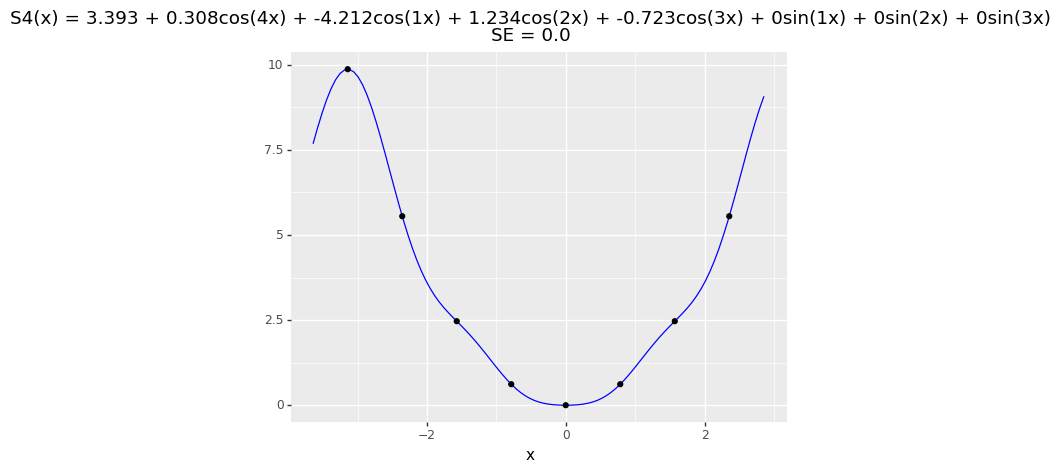

In [ ]:
HelperPlotFFT(x, y, a, b)

### FFT intervalo arbitrario


La función transformada de Fourier en el intervalo $[a, b]$ es de la forma

$$S_m(x) = \frac{a_0 + a_m \cos\left(\frac{2\pi m}{b - a}\left(t - \frac{a + b}{2}\right)\right)}{2} + \sum_{j = 1}^{m - 1}a_j\cos\left(\frac{2\pi j}{b - a}\left(t - \frac{a + b}{2}\right)\right) + \sum_{j = 1}^{m - 1}b_j\sin\left(\frac{2\pi j}{b - a}\left(t - \frac{a + b}{2}\right)\right)$$

con 

$$a_k = \frac{1}{m}\sum_{i = 0}^{2m - 1}y_i\cos\left(\frac{2\pi k}{b - a}\left(t_i - \frac{a + b}{2}\right)\right)\quad k = 0, 1, \dots, m$$

$$b_k = \frac{1}{m}\sum_{i = 0}^{2m - 1}y_i\sin\left(\frac{2\pi k}{b - a}\left(t_i - \frac{a + b}{2}\right)\right)\quad k = 0, 1, \dots, m - 1$$

In [ ]:
def TransformacionIntervalo(t, start, end):
    """
    Dado un array de valores t definido en el intervalo [start, end], realizamos la transformacion
    a los valores correspondientes definidos en el intervalo [-pi, pi]

    Args:
        t: (ndarray) Array de valores en el intervalo [start, end]
        start: (int) Extremo inferior del intervalo [start, end] 
        end: (int) Extremo superior del intervalo [start, end] 

    Returns:
        x: (ndarray) Array de valores en el intervalo [-pi, pi]
    """

    x = (2 * math.pi) / (end - start) * (t - (start + end) / 2)
    return x

Veamos un ejemplo considerando los siguientes datos:

In [ ]:
m = 4
t = np.array([k / (2 * m) for k in range(2 * m)])
start = 0
end = 1
y = np.array([math.pow(tk, 2) for tk in t])

In [ ]:
x = TransformacionIntervalo(t, start, end)

In [ ]:
resultado, a, b = TransformadaFourierRapida(m, y, verbose = True)

Coeficientes para las 4 muestras

Muestra 1: 
c0 = (0.25+0j); c1 = (-0.25+0j)
Muestra 2: 
c0 = (0.625+0j); c1 = (-0.5+0j)
Muestra 3: 
c0 = (0.40625+0j); c1 = (-0.375+0j)
Muestra 4: 
c0 = (0.90625+0j); c1 = (-0.625+0j)


Paso 2 --> 4

Muestra 1: 
[ 0.875+0.j  -0.25 -0.5j -0.375+0.j  -0.25 +0.5j]
Muestra 2: 
[ 1.3125+0.j    -0.375 -0.625j -0.5   +0.j    -0.375 +0.625j]


Paso 4.0 --> 8.0

Muestra 1: 
[ 2.1875    +0.j         -0.07322331-1.2071068j  -0.375     -0.5j
 -0.4267767 -0.20710678j -0.4375    +0.j         -0.4267767 +0.20710678j
 -0.375     +0.5j        -0.07322331+1.2071068j ]


resultado =
[ 2.1875    +0.j         -0.07322331-1.2071068j  -0.375     -0.5j
 -0.4267767 -0.20710678j -0.4375    +0.j         -0.4267767 +0.20710678j
 -0.375     +0.5j        -0.07322331+1.2071068j ]
a =
[ 0.546875    0.01830583 -0.09375     0.10669418 -0.109375  ]
b =
[ 0.30177671 -0.125       0.0517767 ]


Calculemos el error cometido:

In [ ]:
# Valores aproximados
aprox = ValoresFFT(a, b, x, m)

# Calculamos el error
se = SE(y, aprox)
print("SE =", se)

SE = 6.036404401699298e-16


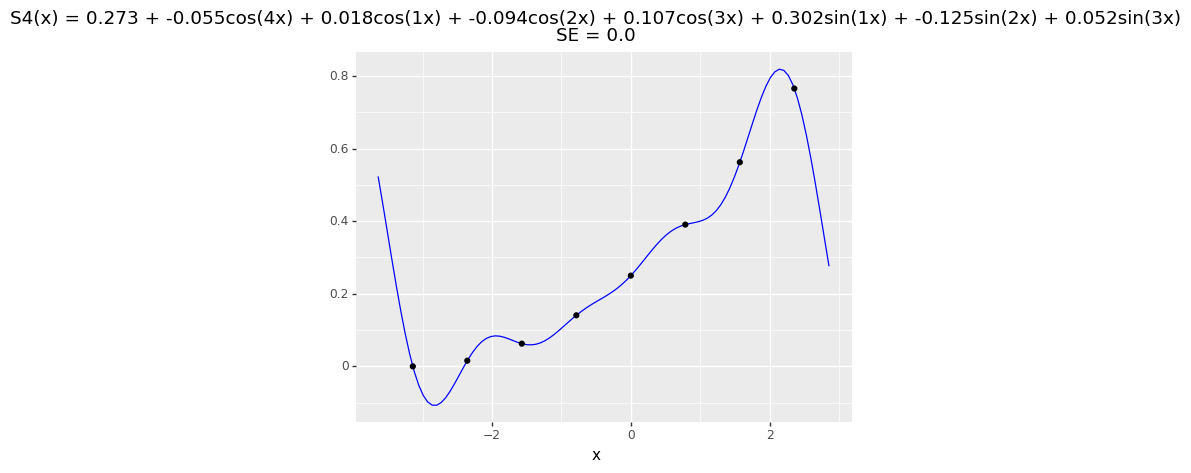

In [ ]:
# Plot en el intervalo [-pi, pi]
HelperPlotFFT(x, y, a, b)

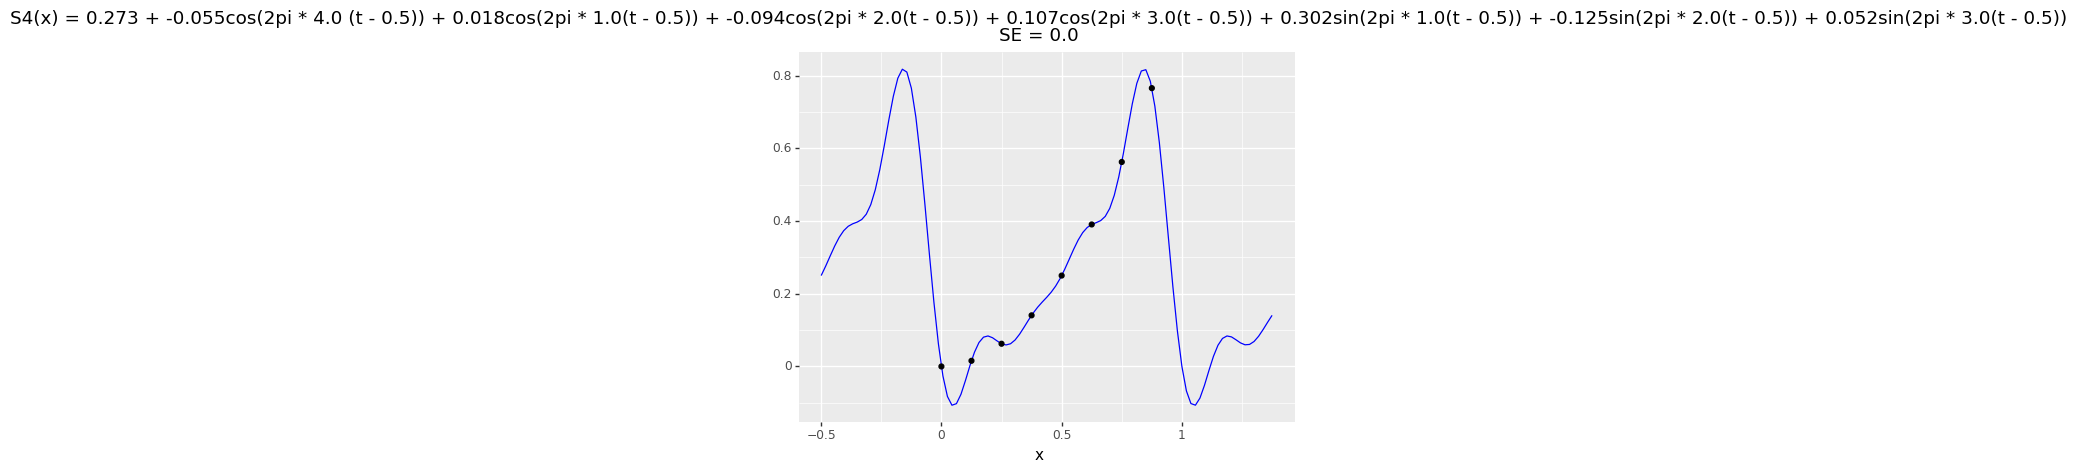

In [ ]:
# Plot en el intervalo [start, end]
HelperPlotFFTIntevaloArbitrario(t, start, end, y, a, b)